In [211]:
import numpy as np
#! pip install openpyxl
import matplotlib.pyplot as plt
import sklearn
#%load_ext cudf.pandas
# pandas API is now GPU accelerated

import pandas as pd

# Importar datos

In [212]:
#Cargamos los datos

data = pd.read_excel('data/bosch_aic_datathon.xlsx')
#Prueba de guardado
# Hacemos copia de los datos
data_sucia = data
data_sucia.head()

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


# Limpieza por columnas

In [213]:
# Poner todas las columnas en mayúsculas
#Prueba de guardadoSs
data_sucia.columns = map(str.upper, data_sucia.columns)
data_sucia.head()

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,AÑOS,MESES,ANTIGÜEDAD,CLAVE DE SEXO,LUGAR DE NACIMIENTO,NACIONALIDAD,EDAD DEL EMPLEADO,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


### Posicion

In [214]:
data_sucia[["POSICIÓN"]]

# Contar veces que aparece la misma posicion
data_sucia.groupby(["POSICIÓN"]).size()



POSICIÓN
POS101      3
POS1010     2
POS1056     1
POS1100     1
POS1111     6
           ..
POS841      1
POS907     12
POS96       3
POS970      1
POS977      2
Length: 97, dtype: int64

In [215]:
data_sucia["POSICIÓN"].unique()

array(['POS514', 'POS1745', 'POS1230', 'POS1661', 'POS1921', 'POS2803',
       'POS538', 'POS1380', 'POS2094', 'POS2003', 'POS347', 'POS1376',
       'POS1323', 'POS2939', 'POS581', 'POS1657', 'POS2384', 'POS2553',
       'POS2802', 'POS2076', 'POS2046', 'POS2856', 'POS1683', 'POS750',
       'POS907', 'POS2745', 'POS1884', 'POS2858', 'POS1559', 'POS841',
       'POS2167', 'POS2817', 'POS1373', 'POS1788', 'POS343', 'POS2847',
       'POS970', 'POS977', 'POS2456', 'POS1111', 'POS2718', 'POS1227',
       'POS2062', 'POS1116', 'POS251', 'POS454', 'POS1010', 'POS1181',
       'POS2988', 'POS1056', 'POS1974', 'POS213', 'POS1365', 'POS2224',
       'POS1845', 'POS1203', 'POS2338', 'POS1439', 'POS500', 'POS1783',
       'POS1702', 'POS1748', 'POS2622', 'POS1488', 'POS780', 'POS1210',
       'POS124', 'POS1667', 'POS1410', 'POS2915', 'POS96', 'POS698',
       'POS139', 'POS1520', 'POS1819', 'POS2913', 'POS1448', 'POS2497',
       'POS2698', 'POS1145', 'POS2848', 'POS723', 'POS1100', 'POS2756',

In [216]:
posicones_encoder = pd.get_dummies(data_sucia, columns=["POSICIÓN"])

posicones_encoder.head()

,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,AÑOS,...,POSICIÓN_POS706,POSICIÓN_POS723,POSICIÓN_POS750,POSICIÓN_POS780,POSICIÓN_POS790,POSICIÓN_POS841,POSICIÓN_POS907,POSICIÓN_POS96,POSICIÓN_POS970,POSICIÓN_POS977
0,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,...,False,False,False,False,False,False,False,False,False,False
1,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,...,False,False,False,False,False,False,False,False,False,False
2,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,...,False,False,False,False,False,False,False,False,False,False
3,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,...,False,False,False,False,False,False,False,False,False,False
4,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,...,False,False,False,False,False,False,False,False,False,False


### Area

### A Liquida

<Axes: ylabel='count'>

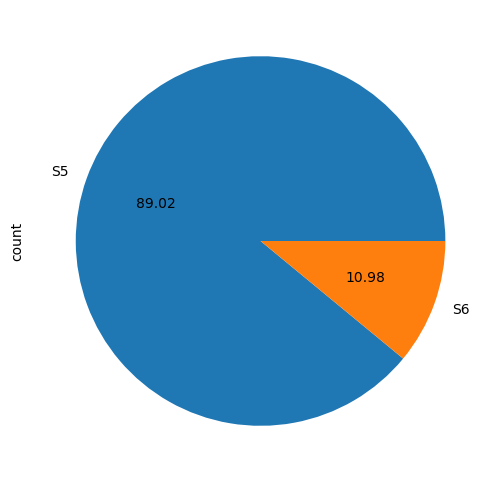

In [217]:
# Convierte columna Á.liq. a categoricos
data_sucia['Á.LIQ.'] = data_sucia['Á.LIQ.'].astype('category')
# Hace plot de pie de la columna Á.liq. con plotly express
data_sucia['Á.LIQ.'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6))


### Grupo de personal

### Codigo postal

In [218]:
# Eliminar filas que tengan menos de 5 digitos en la columna 'CODIGO POSTAL'
data_sucia = data_sucia[data_sucia['CODIGO POSTAL'].astype(str).str.len() >= 5]
# Eliminar filas que tengan más de 5 digitos en la columna 'CODIGO POSTAL'
data_sucia = data_sucia[data_sucia['CODIGO POSTAL'].astype(str).str.len() <= 5]

# Crear un DataFrame con las primeras 5 filas de data_sucia
#data_sucia5 = data_sucia.head(5)

#data_sucia5

In [219]:
import pgeocode
import pandas as pd
from geopy.distance import geodesic

# Función mejorada para calcular la distancia entre dos códigos postales y devolver las coordenadas
def calcular_distancia_y_coordenadas(codigo_postal_origen, codigo_postal_referencia, pais='MX'):
    geolocator = pgeocode.Nominatim(pais)
    ubicacion_origen = geolocator.query_postal_code(codigo_postal_origen)
    ubicacion_referencia = geolocator.query_postal_code(codigo_postal_referencia)
    
    # Inicializar las coordenadas y la distancia en None para manejar posibles códigos postales no encontrados
    distancia, latitud, longitud = None, None, None
    
    # Verificar si ambos códigos postales tienen información de ubicación válida
    if pd.notna(ubicacion_origen.latitude) and pd.notna(ubicacion_referencia.latitude):
        coords_origen = (ubicacion_origen.latitude, ubicacion_origen.longitude)
        coords_referencia = (ubicacion_referencia.latitude, ubicacion_referencia.longitude)
        distancia = geodesic(coords_origen, coords_referencia).meters
        latitud, longitud = coords_origen
        
    return distancia, latitud, longitud

# Código postal de referencia
codigo_postal_referencia = '32557'
"""
# Aplicar la función mejorada a cada fila en el DataFrame y dividir los resultados en tres columnas nuevas
resultados = data_sucia['CODIGO POSTAL'].apply(lambda x: calcular_distancia_y_coordenadas(x, codigo_postal_referencia))
data_sucia['Distancia'], data_sucia['Latitud'], data_sucia['Longitud'] = zip(*resultados)

# Exportar los datos a CSV
data_sucia.to_csv('data_sucia_con_coordenadas.csv', index=False)

# Muestra las primeras filas del DataFrame para verificar
print(data_sucia.head())"""


"\n# Aplicar la función mejorada a cada fila en el DataFrame y dividir los resultados en tres columnas nuevas\nresultados = data_sucia['CODIGO POSTAL'].apply(lambda x: calcular_distancia_y_coordenadas(x, codigo_postal_referencia))\ndata_sucia['Distancia'], data_sucia['Latitud'], data_sucia['Longitud'] = zip(*resultados)\n\n# Exportar los datos a CSV\ndata_sucia.to_csv('data_sucia_con_coordenadas.csv', index=False)\n\n# Muestra las primeras filas del DataFrame para verificar\nprint(data_sucia.head())"

In [220]:
# Calcular distancia entre CP 45430 y 44430
distancia = calcular_distancia('45430', '44430')
print(f"La distancia entre los códigos postales 45430 y 44430 es de {distancia} metros.")

La distancia entre los códigos postales 45430 y 44430 es de 22775.024195317255 metros.


In [221]:
# Volver a cargar los datos desde CSV
data_sucia = pd.read_csv('data_sucia_con_coordenadas.csv')

### Motivo de la renuncia

In [222]:
# Reemplazar 'y/o' por 'y'
data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].replace(to_replace='y/o', value='y', regex=True)

# Luego, reemplazar '-' y '/' con un string vacío
data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].replace(to_replace='[-/.]', value=' ', regex=True)

# Poner todos los valores de MOTIVO DE LA RENUNCIA en mayúsculas
data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].str.upper()

# Crear columna 'TIPO DE RENUNCIA'
data_sucia['TIPO DE RENUNCIA'] = np.where(data_sucia['MOTIVO DE LA RENUNCIA'].str.contains('VOL'), 'VOLUNTARIA', 'DESPIDO')

# Eliminar "VOL " y "IMP " de MOTIVO DE LA RENUNCIA
data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].str.replace('VOL ', '')
data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].str.replace('IMP ', '')


# Hacer count de los valores de MOTIVO DE LA RENUNCIA
data_sucia['MOTIVO DE LA RENUNCIA'].value_counts()

MOTIVO DE LA RENUNCIA
OTRO EMPLEO                     308
TRANSFERENCIA ENTRE PLANTA      237
NO REGRESO   NO DIO RAZÓN       216
PROB PERSONALES Y FAM           197
INSATISFACCIÓN PERSONAL          94
CAMBIO DE DOMICILIO              89
TRA AUSENTISMOS CONTINUOS        71
ESTUDIOS                         68
TRA JUBILACIÓN                   33
RAZONES MÉDICAS                  28
TRA LFT Y REGLAMENTO INT         12
TRA LFT Y REGLAMENTO INT         12
PAT PENSIONADO IMSS               8
PAT TERMINACIÓN DEL CONTRATO      6
TRA BAJO DESEMPEÑO                3
MUERTE NATURAL                    3
MATERNIDAD                        3
PAT TERMINACIÓN DEL CONTRA        2
TRA FALSIFICACIÓN DE DOCTO        2
MUERTE ACCIDENTAL                 2
TRA FALSIFICACIÓN DE DOCTOS       2
MATRIMONIO                        1
TRA USO DE DROGAS Y BEBI          1
PROBLEMAS CON TRANSPORTE          1
AMBIENTE DE TRABAJO               1
PAT VARIOS JUBILADO               1
Name: count, dtype: int64

In [223]:
# Ver valores unicos de Motivo de renuncia
data_sucia

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,...,EDAD,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS,Distancia,TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA,TIENE HIJOS,TIPO DE RENUNCIA,Latitud,Longitud
0,POS514,LOG,S6,Exempt,32520,OTRO EMPLEO,E3,2023-01-02,ADMINIST,2018-06-21,...,31,NaN,Soltero,0,10815.468874,Menos de 1 Año,No,DESPIDO,31.619625,-106.454475
1,POS1745,MFS,S5,Direct,32217,OTRO EMPLEO,DNO,2023-01-03,ADMINIST,2017-07-20,...,25,10+ Years,Soltero,0,18258.464034,10+ Años,No,DESPIDO,31.630600,-106.541467
2,POS1230,VS7,S5,Direct,32600,OTRO EMPLEO,DNO,2023-01-03,JT012324,2019-08-29,...,23,10+ Years,Soltero,0,18460.211303,10+ Años,No,DESPIDO,31.552300,-106.497150
3,POS1661,MFS,S5,Direct,32575,ESTUDIOS,DO,2023-01-03,JT012324,2022-11-03,...,18,10+ Years,Soltero,0,6025.403146,10+ Años,No,DESPIDO,31.615350,-106.381063
4,POS1921,MFS,S5,Direct,32575,CAMBIO DE DOMICILIO,DO,2023-01-03,JT012324,2017-03-02,...,26,10+ Years,Soltero,0,6025.403146,10+ Años,No,DESPIDO,31.615350,-106.381063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,POS790,QMM,S6,Exempt,32585,TRANSFERENCIA ENTRE PLANTA,E4,2022-12-31,ADMINIST,2011-09-12,...,44,NaN,Casad,0,5665.346809,Menos de 1 Año,Sí,DESPIDO,31.631000,-106.398500
1397,POS2802,TEF,S5,Direct,32575,CAMBIO DE DOMICILIO,DNO,2022-07-26,JT012324,2015-08-05,...,28,NaN,Soltero,0,6025.403146,Menos de 1 Año,Sí,DESPIDO,31.615350,-106.381063
1398,POS538,VS7,S5,Direct,32575,NO REGRESO NO DIO RAZÓN,DNO,2022-09-02,JT031800,2022-07-21,...,21,NaN,Soltero,0,6025.403146,Menos de 1 Año,No,DESPIDO,31.615350,-106.381063
1399,POS538,VS9-ABS,S5,Direct,32600,TRA AUSENTISMOS CONTINUOS,DNO,2022-09-02,JT031800,2017-03-30,...,45,NaN,U-Libr,2,18460.211303,Menos de 1 Año,No,DESPIDO,31.552300,-106.497150


#### Separacion Vol e Imp y se añade una nueva columna para identificar el tipo de renunica

In [224]:
#data_sucia[['TIPO RENUNCIA','MOTIVO DE LA RENUNCIA']] = data_sucia['MOTIVO DE LA RENUNCIA'].str.split(' ', 1, expand=True)
#Eliminamos valores que pueden haber quedado
#data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].str.strip()

### Baja

Este no se modifica ya que es un datetime

In [225]:
# Tomar columna BAJA y convertirla en fecha
data_sucia["BAJA"] = pd.to_datetime(data_sucia["BAJA"])

### Alta

Este no se modifica ya que es un datetime

In [226]:
# Tomar columna ALTA y convertirla en fecha
data_sucia["ALTA"] = pd.to_datetime(data_sucia["ALTA"])

### Regla PHT

In [227]:
data_sucia["REGLAPHT"] = data_sucia["REGLAPHT"].astype('category')

### Años

Se mantiene igual ya que todos son tipo entero, además no existen valores nulos

### Meses

Se mantiene igual ya que todos son tipo flotante, además no existen valores nulos

### Dias totales/Antigüedad

Se mantiene igual ya que todos son tipo entero, además no existen valores nulos

### Sexo

In [228]:
data_sucia[["SEXO"]]

,SEXO
0,F
1,M
2,M
3,F
4,M
...,...
1396,M
1397,M
1398,F
1399,F


In [229]:
data_sucia["SEXO"].unique()

array(['F', 'M'], dtype=object)

In [230]:
reemplazo_sexo = {"Femenino":"F",
              "Masculino":"M"}

In [231]:
data_sucia['SEXO'].replace(reemplazo_sexo)
data_sucia['SEXO'] = data_sucia['SEXO'].replace(reemplazo_sexo)
# Cambiar nombre de columna a sexo
data_sucia.rename(columns={"SEXO": "SEXO"}, inplace=True)

Falta susutituir la columna en data_sucia

### Lugar de nacimiento

In [232]:
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Diccionario de reemplazos
reemplazos = {
    'CHIHUAHUA': ['AHUMADA', 'ALLENDE', 'ALLENDE, CHIH.', 'AZTECA CIUDAD JUAREZ', 'BALLEZA','BALLEZA, CHIHUAHUA','BUENAVENTURA','CD. DELICIAS CHIH.','CAMARGO','CUAUHTEMOC','CD JUAREZ',' CD JUAREZ CHIH','CD. JUAREZ','CD. JUAREZ CHIH','CD. JUAREZ CHIH.','CD. JUAREZ CHIHUAHUA','CD. JUAREZ, CHIH','CD. JUAREZ, CHIH.','CD. JUAREZ, CHIHUAHUA','JUAREZ, CHIHUAHUA','CD JUAREZ CHIH','CD.JUAREZ','CD.JUAREZ,CHIH','CHIHUAHUA CHIH.','CHIHUAHUA CHIH','CHAPAM','CIU','CIUDAD JUAREZ','CIUDAD JUAREZ, CHIH','CUAHUTEMOC','CUAUHTEMOC, CHIH','CUAHUTEMOC, CHIH','DELICIAS','DELICIAS CHIHUAHUA','EL MADERAL','GOMEZ FARIAS CHIHUAHUA','GOMEZ FARIAS, CHIHUAHU','GPE. VICTORIA CHIH.','HGO DEL PARRAL CHIH','HIDALGO DE PARRAL','HIDALGO DEL PARRAL','HIDALGO DEL PARRAL, CHIH.','JIMENEZ','JUAREZ','JUAREZ CHIHUAHUA','MADERA','NAICA, CHIHUAHUA','NUEVO CASAS GRANDES, CHIH','NVO CASAS GRANDES','CHIHUAHUA CHI.','PARRAL, CHIH','S.F. DEL ORO, CHIH.','SANTA BARBARA','STA BARBARA','VILLA AHUMADA'],
    'DURANGO': ['CD GOMEZ PALACIO','CD. GOMEZ PALACIO','CUENCAME','GENERAL SIMON BOLIVAR', 'GOMEZ PALACIO', 'LERDO', 'MAPIMI', 'NAZAS', 'PANUCO DE CORONADO', 'PEÑON BLANCO', 'POANAS', 'POBLADO EL LUCERO', 'SANTIAGO PAPASQUIARO','SAN DIMAS', 'SANTA MARIA DE OTAEZ', 'TLAHUALILO DE ZARAGOZA'],
    'AGUASCALIENTES': ['AGUASCALIENTES','AGSCALIENTES'],
    'BAJA CALIFORNIA': ['ENSENADA BAJA CALIFORNIA','MEXICALI'],
    'BAJA CALIFORNIA SUR':['COMONDU'],
    'CAMPECHE':['MIGUEL. A.C. CAMPECHE'],
    'CHIAPAS':['AGENCIA TECTUAPAN','ARRIAGA','CINTALAPA','JIQUIPILAS','MAPASTEPEC','MOTOZINTLA','OCOSINGO','PIJIJIAPAN','TECPATAN','TUXTLA GUTIERREZ'],
    'CDMX':['DF','DISTRITO FEDERAL','MEXICO D.F','MEXICO D.F.','MEXICO DF','MIGUEL HIDALGO','VENUSTIANO CARRANZA'],
    'COAHUILA':['SAN ANTONIO COAH.','COAHILA','COAHUILA DE ZARAGOZA','E. NVO. MUNDO, COAHUILA','EJISO NUEVO BENAVIDES','MATAMOROS COAH.','PIEDRAS NEGRAS','RAMOS ARIZPE','SALTILLO','SAN ANDRES COAH.','SAN RAFAEL ARRIBA, COAH.','TORREON','TORREON, COAHUILA','VIESCA'],
    'ESTADO DE MEXICO':['ATIZAPAN','CUAUTITLAN IZCALLI','MEXICO','MIGUEL ANGEL','OTUMBA','SANTA ROSA','TOLUCA','TOLUCA MEXICO','VILLA VICTORIA'],
    'GUANAJUATO':['GUANAJUATIO','IRAPUATO','LEON','OCAMPO','PENJAMO'],
    'GUERRERO':['ACAPULCO','JUAN R. ESCUDERO','XOCHIPALA'],
    'HIDALGO':['FRANCISCO I MADERO','FRANCISCO I. MADERO'],
    'JALISCO':['CIHUATLAN','GUADALAJARA','JUANACATLAN'],
    'MICHOACAN':['CARDENAS','LAZARO CARDENAS','PUNTA DE AGUA'],
    'MORELOS':['CUERNAVACA','TEMIXO'],
    'NUEVO LEON':['GUADALUPE','MONTERREY','SAN PEDRO'],
    'OAXACA':['JUCHITAN','JUCHITLAN','IXHUATAN','IXHUATLAN DEL SURESTE','LOMA BONITA','LOMA BONITA, OAXACA','OAXACA DE JUAREZ','PASO DEL JOBO','SAN ANDRES OAX','SAN FELIPE USILA','SAN FRANCISCO DEL MAR','SAN FRANCISCO IXHUATAN','SAN JUAN BAUTISTA TUXTEPE','SAN LUCAS OJITLAN','TUXTEPEC','TUXTEPEC OAXACA'],
    'PUEBLA':['GUADALUPE ANALCO','GUADALUPE VICTORIA','PUEBLA, PUEBLA','TEZIUTLAN','VICENTE GUERRERO','ZARAGOZA'],
    'QUERETARO':['QUERETARO, QRO'],
    'SONORA':['AGUA PRIETA','CAJEME'],
    'SINALOA':['AHOME','CULIACAN','EL FUERTE','EL FUERTE SIN.','LOS MOCHIS'],
    'TAMAULIPAS':['MATAMOROS','TAMPICO'],
    'TABASCO':['VILLAHERMOSA','HUIMANGUILLO','COMALCALCO'],
    'TAMAULIPAS':['MATAMOROS','TAMPICO'],
    'USA':['ATLANTA','LOS ANGELES','TEXAS'],
    'VERACRUZ':['SANTIAGO TUXTLA','MISANTLA','ACAYUCAN','ANGEL R CABADA','CARLOS ALAMILLO, VERACRUZ','COATZACOALCOS','CORDOBA','CORDOVA','CORDOVA VER','COSAMALOAPAN','COSAMALOAPAN DE CARPIO','COSAMALOPAPAN','COSOLEACAQUE','CHOAPAM','ETMAPACHE','JALTIPAN','JESUS CARRANZA','LAS MERCEDES','LERDO DE TEJADA','MARTINEZ DE LA TORRE','MECAYAPAN','MINATITLAN','MISATITLAN','MISANTLA','MOLOACAN','NANCHITAL','OLUTA','ORIZABA','OTEAPAN','PASO DE OVEJAS','POZA RICA DE HIDALGO','RAYA CARACOL','SAN ANDRES TUXTLA','SOTEAPAN','TATAHUICAPAN','TATAUICAPAN','TIERRA BLANCA','TRES VALLES'],
    'ZACATECAS':['BOQUILLA DE ABAJO','EJIDO ZARAGOZA SOBRERETE','FRESNILLO','JUAN ALDAMA','LAS PILAS ZAC.','RIO GRANDE','SAN PEDRO VALPARAISO','LAS PILAS ZAC'],
  
    # Agrega el resto de tus reemplazos aquí
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos = {ciudad: estado for estado, ciudades in reemplazos.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['LUGAR DE NACIMIENTO'] = data_sucia['LUGAR DE NACIMIENTO'].replace(reemplazos_invertidos)

# Ver resultados de los reemplazos usando aleatoriedad
data_sucia['LUGAR DE NACIMIENTO'].sample(10)

# Hacer plot de barras con plotly express para ver la distribución de los estados de nacimiento
import plotly.express as px
fig = px.histogram(data_sucia, x='LUGAR DE NACIMIENTO')
fig.show()

### Nacionalidad

### Edad del empleado

In [233]:
# Edad del empleado
# Convertir en tipos de datos enteros
data_sucia['EDAD'] = data_sucia['EDAD'].astype(int)
# Cambiar nombre de columna a Edad
data_sucia = data_sucia.rename(columns={'EDAD': 'EDAD'})

# Ver resultados de los reemplazos usando aleatoriedad
data_sucia['EDAD'].sample(10)

140     25
1066    20
617     28
485     21
877     28
449     22
1189    53
529     31
1102    41
176     33
Name: EDAD, dtype: int64

### Tiempo viviendo en Ciudad Juarez

In [234]:
# Categorizar "Tiempo Viviendo en Ciudad Juárez"

def categorize_time_living(time):
    if pd.isna(time) or (isinstance(time, str) and 'Days' in time):
        return 'Menos de 1 Año'
    elif (isinstance(time, int) and 1 <= time <= 3) or (isinstance(time, str) and any(x in time for x in ['1-2 Years', '2-3 Years','1-2 Years '])):
        return '1-3 Años'
    elif (isinstance(time, int) and 4 <= time <= 6) or (isinstance(time, str) and any(x in time for x in ['3-4 Years', '4-5 Years', '5-6 Years','6 Years'])):
        return '4-6 Años'
    elif (isinstance(time, int) and 7 <= time <= 9) or (isinstance(time, str) and any(x in time for x in ['6-7 Years', '7-8 Years', '8-9 Years','7-8 Years', '8-9 Years'])):
        return '7-9 Años'
    else:
        return '10+ Años'

# Apply the categorization
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'] = data_sucia['¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?'].apply(categorize_time_living)

# Display the first few rows to verify the categorization
data_sucia[['¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?', 'TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA']].head()

# Convertir en cateogorico 
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'] = data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'].astype('category')

# Saber cuantos valores hay en cada categoria de la columna Tiempo Viviendo en Cd. Juarez - Categoría
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'].astype('category').value_counts()

# Hacer plot de pie de la columna Tiempo Viviendo en Cd. Juarez - Categoría con plotly-express
import plotly.express as px
fig = px.pie(data_sucia, names='TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA', title='Tiempo Viviendo en Cd. Juarez - Categoría')
fig.show()

### Estado civil

In [235]:
data_sucia['ESTADO CIVIL'].fillna('Solter', inplace=True)

# Definir el mapeo de los valores
estado_civil_mapping = {
    'Solter': 'Soltero',
    'viud.': 'Soltero',
    'solter': 'Soltero',
    'casad.': 'Casado',
    'Casad.': 'Casado',
    'Divorc': 'Separado',
    'Sep.': 'Separado',
    'divorc': 'Separado',
    'Concu.': 'Union Libre',
    'U.Libr': 'Union Libre'
}

# Reemplazando los valores
data_sucia['ESTADO CIVIL'] = data_sucia['ESTADO CIVIL'].replace(estado_civil_mapping)

# Convertir en categorico
data_sucia['ESTADO CIVIL'] = data_sucia['ESTADO CIVIL'].astype('category')

data_sucia['ESTADO CIVIL'].unique()

# Hacer plot de pie de la columna Estado Civil usando plotly express
import plotly.express as px
fig = px.pie(data_sucia, names='ESTADO CIVIL', title='Estado Civil')
fig.show()


### Hijos

In [236]:
# Convertir columna hijos a enteros
data_sucia['HIJOS'] = data_sucia['HIJOS'].astype(int)

# Crear una columna con nombre 'Tiene Hijos' que sera 'Sí' si 'Hijos' > 0 y 'No' si 'Hijos' == 0
data_sucia['TIENE HIJOS'] = data['HIJOS'].apply(lambda x: 'Sí' if x > 0 else 'No')

# Convertir columna Tiene Hijos booleana
data_sucia['TIENE HIJOS'] = data_sucia['TIENE HIJOS'].astype('category')


### Correlacion en las columnas AREA,  MOTIVO DE LA RENUNCIA, BANDA, ANTIGÜEDAD

In [237]:
data_correlacion = data_sucia[['AREA', 'MOTIVO DE LA RENUNCIA', 'BANDA', 'ANTIGÜEDAD']]
data_correlacion_one_hot = pd.get_dummies(data_correlacion, columns=['AREA', 'MOTIVO DE LA RENUNCIA', 'BANDA'], dtype='bool')

# Calcular la matriz de correlación
correlation_matrix = data_correlacion_one_hot.corr()

# Mostrar la correlación con respecto a 'MOTIVO DE LA RENUNCIA' de menor a mayor
# (asumiendo que has convertido esta columna en múltiples columnas numéricas)
print(correlation_matrix.filter(regex='MOTIVO DE LA RENUNCIA'))

# Hacer plot de la matriz de correlación usando plotly express
import plotly.express as px
fig = px.imshow(correlation_matrix)
fig.show()

                                                    MOTIVO DE LA RENUNCIA_AMBIENTE DE TRABAJO  \
ANTIGÜEDAD                                                                          -0.022367   
AREA_Admin MSE1                                                                     -0.000714   
AREA_Admin MSE2                                                                     -0.001011   
AREA_CTG                                                                            -0.002025   
AREA_DBE                                                                            -0.001599   
AREA_HRL                                                                            -0.002266   
AREA_HSE                                                                            -0.001599   
AREA_LOG                                                                            -0.007289   
AREA_MFS                                                                            -0.013536   
AREA_QMM                      

In [238]:
#
data_limpia = data_sucia

# Guardar los datos limpios en csv utf8
data_limpia.to_csv('bosch_aic_datathon_limpio.csv', encoding='utf-8', index=False)

data_limpia.head()

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,...,EDAD,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS,Distancia,TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA,TIENE HIJOS,TIPO DE RENUNCIA,Latitud,Longitud
0,POS514,LOG,S6,Exempt,32520,OTRO EMPLEO,E3,2023-01-02,ADMINIST,2018-06-21,...,31,NaN,Soltero,0,10815.468874,Menos de 1 Año,No,DESPIDO,31.619625,-106.454475
1,POS1745,MFS,S5,Direct,32217,OTRO EMPLEO,DNO,2023-01-03,ADMINIST,2017-07-20,...,25,10+ Years,Soltero,0,18258.464034,10+ Años,No,DESPIDO,31.630600,-106.541467
2,POS1230,VS7,S5,Direct,32600,OTRO EMPLEO,DNO,2023-01-03,JT012324,2019-08-29,...,23,10+ Years,Soltero,0,18460.211303,10+ Años,No,DESPIDO,31.552300,-106.497150
3,POS1661,MFS,S5,Direct,32575,ESTUDIOS,DO,2023-01-03,JT012324,2022-11-03,...,18,10+ Years,Soltero,0,6025.403146,10+ Años,No,DESPIDO,31.615350,-106.381063
4,POS1921,MFS,S5,Direct,32575,CAMBIO DE DOMICILIO,DO,2023-01-03,JT012324,2017-03-02,...,26,10+ Years,Soltero,0,6025.403146,10+ Años,No,DESPIDO,31.615350,-106.381063


----
# Subida de datos en DB MySQL

In [239]:
"""# Importar libreria para trabajar con mysql
#! pip install mysql-connector-python
import mysql.connector

# Hacer un mapeo de los datos necesarios para conectarse
config = {
    'user': 'datathonequipo5',
    'password': 'CodedSpiritDev05',
    'host': 'datathon.mysql.database.azure.com',
    'database': 'datathon'
}

# Conectarse a la base de datos
cnx = mysql.connector.connect(**config)

# Verificar la conexión
cnx.is_connected()

# Cerrar la conexión
cnx.close()"""

"# Importar libreria para trabajar con mysql\n#! pip install mysql-connector-python\nimport mysql.connector\n\n# Hacer un mapeo de los datos necesarios para conectarse\nconfig = {\n    'user': 'datathonequipo5',\n    'password': 'CodedSpiritDev05',\n    'host': 'datathon.mysql.database.azure.com',\n    'database': 'datathon'\n}\n\n# Conectarse a la base de datos\ncnx = mysql.connector.connect(**config)\n\n# Verificar la conexión\ncnx.is_connected()\n\n# Cerrar la conexión\ncnx.close()"